<a href="https://colab.research.google.com/github/Iamnetis/UMSL-AI/blob/main/Activity_10_(Regression_using_NN_and_evaluation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


In [ ]:
import pandas as pd
data = pd.read_csv('heart_failure_clinical_records_dataset.csv', delimiter =',')
data.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
print (data.shape)

(299, 13)


In [ ]:
import numpy as np
dataset = np.genfromtxt('heart_failure_clinical_records_dataset.csv', delimiter = ',', skip_header = True)

In [ ]:
np.set_printoptions(formatter={'float': '{:0.4f}'.format})

In [ ]:
X = dataset[:, [1,2,3,4,5,6,7,8,9,10,11,12]]
Y = dataset[:,0]

In [ ]:
#Data Normalization
min = X.min(axis = 0)
max = X.max(axis = 0)
X = (X-min)/(max-min)
print (min)
print('/n')
print (max)

[0.00e+00 2.30e+01 0.00e+00 1.40e+01 0.00e+00 2.51e+04 5.00e-01 1.13e+02
 0.00e+00 0.00e+00 4.00e+00 0.00e+00]
/n
[1.000e+00 7.861e+03 1.000e+00 8.000e+01 1.000e+00 8.500e+05 9.400e+00
 1.480e+02 1.000e+00 1.000e+00 2.850e+02 1.000e+00]


In [ ]:
print(X[0])
print('\n' * 3)
print(Y[:5])

[0.         0.07131921 0.         0.09090909 1.         0.29082313
 0.15730337 0.48571429 1.         0.         0.         1.        ]




[75. 55. 65. 50. 65.]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(20, input_dim = 12, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

In [ ]:

model.compile(loss = 'msle', optimizer = 'nadam', metrics=['mae'])

In [ ]:
model.fit(x = X, y = Y, epochs= 1500, verbose = 1)

Epoch 1/1500
10/10 [==============================] - 0s 1ms/step - loss: 16.8310 - mae: 60.8254
Epoch 2/1500
10/10 [==============================] - 0s 1ms/step - loss: 16.6525 - mae: 60.8015
Epoch 3/1500
10/10 [==============================] - 0s 1ms/step - loss: 16.0001 - mae: 60.7103
Epoch 4/1500
10/10 [==============================] - 0s 1ms/step - loss: 14.7229 - mae: 60.5117
Epoch 5/1500
10/10 [==============================] - 0s 1ms/step - loss: 13.4917 - mae: 60.2782
Epoch 6/1500
10/10 [==============================] - 0s 2ms/step - loss: 12.3273 - mae: 60.0039
Epoch 7/1500
10/10 [==============================] - 0s 2ms/step - loss: 11.1604 - mae: 59.6597
Epoch 8/1500
10/10 [==============================] - 0s 2ms/step - loss: 10.0069 - mae: 59.2326
Epoch 9/1500
10/10 [==============================] - 0s 1ms/step - loss: 8.8499 - mae: 58.6816
Epoch 10/1500
10/10 [==============================] - 0s 1ms/step - loss: 7.6784 - mae: 57.9570
Epoch 11/1500
10/10 [==========

In [ ]:
true_ages = Y
predictions = model.predict(X)
print (true_ages[:20])

[75. 55. 65. 50. 65. 90. 75. 60. 65. 80. 75. 62. 45. 50. 49. 82. 87. 45.
 70. 48.]


In [ ]:
print (predictions[:20].T)

[[74.17608  55.26891  68.23171  72.268486 65.00373  83.671005 68.30062
  60.84514  64.68862  77.84857  75.03634  62.23852  71.972435 61.145924
  48.3675   76.4056   75.959236 55.445213 64.88606  48.169502]]


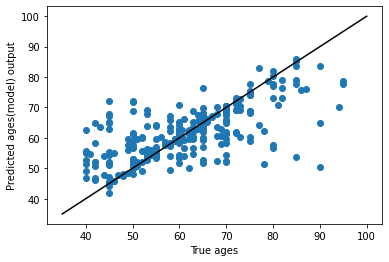

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(true_ages, predictions.flatten())
plt.xlabel('True ages')
plt.ylabel('Predicted ages(model) output')
plt.plot([35, 100], [35, 100], color = 'black')
plt.show()

In [ ]:
diff = abs(true_ages - predictions.flatten())
print(diff[:5])

[8.23921204e-01 2.68909454e-01 3.23171234e+00 2.22684860e+01
 3.73077393e-03]


In [ ]:
diff.mean()

5.406463993034235

In [ ]:
diff.std()

6.625833038204591